In [25]:
!pip install seaborn
!pip install ipywidgets

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [26]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML

rc('animation', html='jshtml')

First, we'd like to import our files and join them together into one big file.


In [27]:
all_weeks_input = glob.glob("D:/2nd  year/1st term/Machine learning/project/nfl-big-data-bowl-2026-prediction/train/input_*.csv")
all_weeks_output = glob.glob("D:/2nd  year/1st term/Machine learning/project/nfl-big-data-bowl-2026-prediction/train/output_*.csv")
print(f'Input data for training consists of {len(all_weeks_input)} files.')
print(f'Output data for training consists of {len(all_weeks_output)} files.')
df_list_input = [pd.read_csv(f) for f in all_weeks_input]
df_list_output = [pd.read_csv(f) for f in all_weeks_output]
df_input = pd.concat(df_list_input, ignore_index=True)
df_output = pd.concat(df_list_output, ignore_index=True)


Input data for training consists of 18 files.
Output data for training consists of 18 files.


In [28]:

print("=" * 50)
print("         **** Input Datafram Info ****")
df_input.info(show_counts=True)
print('Number of missing values in input file:')
df_input.isnull().sum()

         **** Input Datafram Info ****
<class 'pandas.DataFrame'>
RangeIndex: 4880579 entries, 0 to 4880578
Data columns (total 23 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   game_id                   4880579 non-null  int64  
 1   play_id                   4880579 non-null  int64  
 2   player_to_predict         4880579 non-null  bool   
 3   nfl_id                    4880579 non-null  int64  
 4   frame_id                  4880579 non-null  int64  
 5   play_direction            4880579 non-null  object 
 6   absolute_yardline_number  4880579 non-null  int64  
 7   player_name               4880579 non-null  object 
 8   player_height             4880579 non-null  object 
 9   player_weight             4880579 non-null  int64  
 10  player_birth_date         4880579 non-null  object 
 11  player_position           4880579 non-null  object 
 12  player_side               4880579 non-null  object 
 13 

game_id                     0
play_id                     0
player_to_predict           0
nfl_id                      0
frame_id                    0
play_direction              0
absolute_yardline_number    0
player_name                 0
player_height               0
player_weight               0
player_birth_date           0
player_position             0
player_side                 0
player_role                 0
x                           0
y                           0
s                           0
a                           0
dir                         0
o                           0
num_frames_output           0
ball_land_x                 0
ball_land_y                 0
dtype: int64

In [29]:
print("=" * 50)
print("         **** Output Datafram Info ****")
df_output.info(show_counts=True)
print('Number of missing values in output file:')
df_output.isnull().sum()

         **** Output Datafram Info ****
<class 'pandas.DataFrame'>
RangeIndex: 562936 entries, 0 to 562935
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   game_id   562936 non-null  int64  
 1   play_id   562936 non-null  int64  
 2   nfl_id    562936 non-null  int64  
 3   frame_id  562936 non-null  int64  
 4   x         562936 non-null  float64
 5   y         562936 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 25.8 MB
Number of missing values in output file:


game_id     0
play_id     0
nfl_id      0
frame_id    0
x           0
y           0
dtype: int64

So we can see that there are no missing values in our data which is quite a feat!

Some preliminary EDA to check the quality of the data:
 

In [ ]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)
display(df_input.head())
display(df_input.describe(include=[np.number]))
df_input.nunique().sort_values() 


game_id  play_id  player_to_predict  nfl_id  frame_id play_direction  \
0  2023090700      101              False   54527         1          right   
1  2023090700      101              False   54527         2          right   
2  2023090700      101              False   54527         3          right   
3  2023090700      101              False   54527         4          right   
4  2023090700      101              False   54527         5          right   

   absolute_yardline_number player_name player_height  player_weight  \
0                        42  Bryan Cook           6-1            210   
1                        42  Bryan Cook           6-1            210   
2                        42  Bryan Cook           6-1            210   
3                        42  Bryan Cook           6-1            210   
4                        42  Bryan Cook           6-1            210   

  player_birth_date player_position player_side         player_role      x  \
0        1999-09-07              FS     Defense  Defensive Coverage  52.33   
1        1999-09-07              FS     Defense  Defensive Coverage  52.33   
2        1999-09-07              FS     Defense  Defensive Coverage  52.33   
3        1999-09-07              FS     Defense  Defensive Coverage  52.35   
4        1999-09-07              FS     Defense  Defensive Coverage  52.37   

       y     s     a     dir       o  num_frames_output  ball_land_x  \
0  36.94  0.09  0.39  322.40  238.24                 21    63.259998   
1  36.94  0.04  0.61  200.89  236.05                 21    63.259998   
2  36.93  0.12  0.73  147.55  240.60                 21    63.259998   
3  36.92  0.23  0.81  131.40  244.25                 21    63.259998   
4  36.90  0.35  0.82  123.26  244.25                 21    63.259998   

   ball_land_y  player_height_in  player_age  
0        -0.22                73       26.13  
1        -0.22                73       26.13  
2        -0.22                73       26.13  
3        -0.22                73       26.13  
4        -0.22                73       26.13

game_id       play_id        nfl_id      frame_id  \
count  4.880579e+06  4.880579e+06  4.880579e+06  4.880579e+06   
mean   2.023155e+09  2.196409e+03  4.955890e+04  1.613179e+01   
std    2.011405e+05  1.246426e+03  5.210338e+03  1.113008e+01   
min    2.023091e+09  5.400000e+01  3.084200e+04  1.000000e+00   
25%    2.023101e+09  1.150000e+03  4.519800e+04  8.000000e+00   
50%    2.023111e+09  2.171000e+03  5.241300e+04  1.500000e+01   
75%    2.023121e+09  3.246000e+03  5.450000e+04  2.200000e+01   
max    2.024011e+09  5.258000e+03  5.667300e+04  1.230000e+02   

       absolute_yardline_number  player_weight             x             y  \
count              4.880579e+06   4.880579e+06  4.880579e+06  4.880579e+06   
mean               6.055045e+01   2.112783e+02  6.050074e+01  2.681190e+01   
std                2.305935e+01   2.217747e+01  2.348919e+01  1.000620e+01   
min                1.100000e+01   1.530000e+02  4.100000e-01  6.200000e-01   
25%                4.100000e+01   1.950000e+02  4.263000e+01  1.899000e+01   
50%                6.100000e+01   2.070000e+02  6.041000e+01  2.685000e+01   
75%                8.000000e+01   2.250000e+02  7.823000e+01  3.462000e+01   
max                1.090000e+02   3.580000e+02  1.198600e+02  5.288000e+01   

                  s             a           dir             o  \
count  4.880579e+06  4.880579e+06  4.880579e+06  4.880579e+06   
mean   3.019878e+00  2.118335e+00  1.804972e+02  1.815366e+02   
std    2.227939e+00  1.415794e+00  1.007162e+02  9.800912e+01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.090000e+00  1.010000e+00  9.091000e+01  9.174000e+01   
50%    2.720000e+00  1.920000e+00  1.795600e+02  1.801400e+02   
75%    4.620000e+00  3.040000e+00  2.708300e+02  2.715800e+02   
max    1.253000e+01  1.712000e+01  3.600000e+02  3.600000e+02   

       num_frames_output   ball_land_x   ball_land_y  player_height_in  \
count       4.880579e+06  4.880579e+06  4.880579e+06      4.880579e+06   
mean        1.164147e+01  6.051581e+01  2.663766e+01      7.306844e+01   
std         5.331537e+00  2.529643e+01  1.543814e+01      2.254261e+00   
min         5.000000e+00 -5.260000e+00 -3.910000e+00      6.600000e+01   
25%         8.000000e+00  4.261000e+01  1.330000e+01      7.200000e+01   
50%         1.000000e+01  6.051000e+01  2.647000e+01      7.300000e+01   
75%         1.400000e+01  7.847000e+01  3.987000e+01      7.500000e+01   
max         9.400000e+01  1.258500e+02  5.733000e+01      8.100000e+01   

         player_age  
count  4.880579e+06  
mean   2.854526e+01  
std    2.970859e+00  
min    2.305000e+01  
25%    2.632000e+01  
50%    2.812000e+01  
75%    3.029000e+01  
max    4.143000e+01

AttributeError: 'NoneType' object has no attribute 'round'

# Data preprocessing/feature engineering
From what we can see, some variables still require conversion such as player_height (convert to inches) and player_birth_date to convert to the more directly relevant player_age
partly from from notebook:https://www.kaggle.com/code/wafaaalayoubi/step-by-step-eda-for-player-prediction

In [31]:
# Converting height from foot_inch to total inches:
def height_to_inches(h):
    ft, inch = h.split('-')
    return int(ft) * 12 + int(inch)
df_input['player_height_in'] = df_input['player_height'].apply(height_to_inches)

In [32]:
# Calculating player age using their birthdays
df_input['player_birth_date'] = pd.to_datetime(df_input['player_birth_date'])
df_input['player_age']= ((pd.Timestamp.now() - df_input['player_birth_date']).dt.days / 365.25).round(2)
df_input[['player_name', 'player_birth_date', 'player_age']].head()

player_name player_birth_date  player_age
0  Bryan Cook        1999-09-07       26.13
1  Bryan Cook        1999-09-07       26.13
2  Bryan Cook        1999-09-07       26.13
3  Bryan Cook        1999-09-07       26.13
4  Bryan Cook        1999-09-07       26.13

In [33]:
# Standardizing play direction to avoid having mirrored coordinate systems by converting all plays to right
df_left = df_input[df_input['play_direction'] == 'left'].copy()
df_right = df_input[df_input['play_direction'] == 'right'].copy()
df_left['x'] = 120 - df_left['x']
df_left['y'] = 53.3 - df_left['y']
df_left['o'] = (df_left['o'] + 180) % 360
df_left['dir'] = (df_left['dir'] + 180) % 360
df_left['ball_land_x'] = 120 - df_left['ball_land_x']
df_left['ball_land_y'] = 53.3 - df_left['ball_land_y']
processed_df_input = pd.concat([df_left, df_right], ignore_index=True)

In order to verify that the standardized coordinates are mirrored correctly:

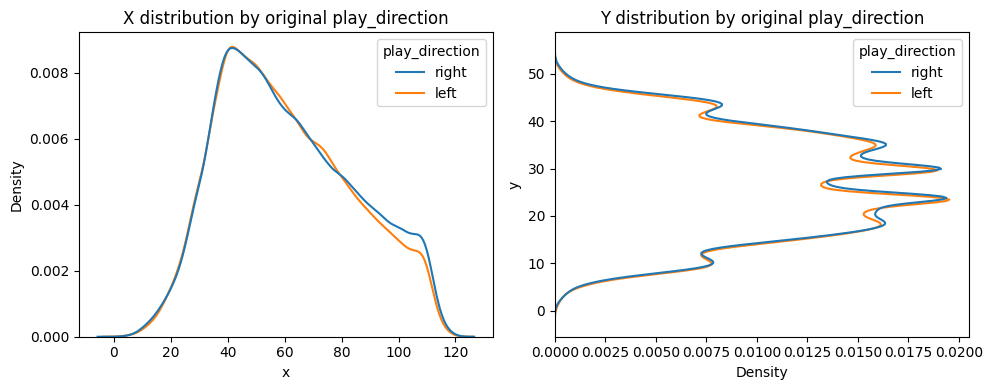

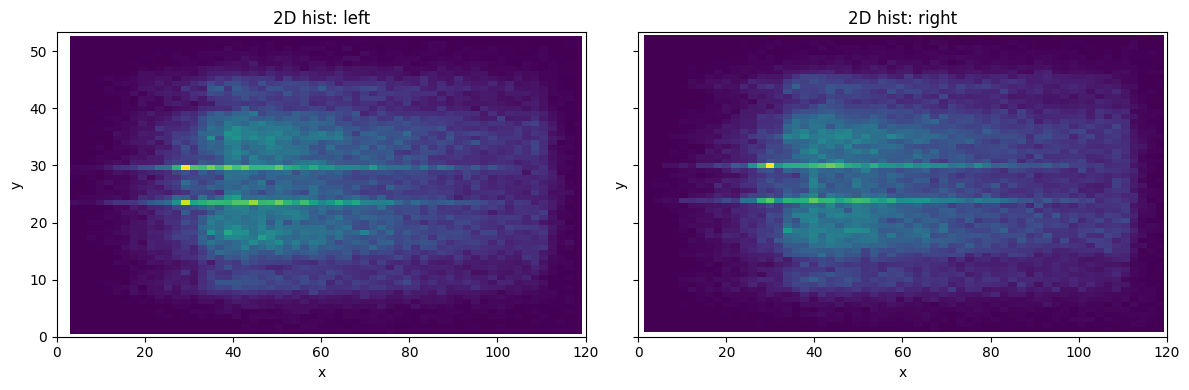

In [69]:
# SAMPLE (optional for speed)
dfv = processed_df_input.sample(min(len(processed_df_input), 200_000), random_state=42)
# A) Overlaid distributions — should overlap if standardization worked
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.kdeplot(data=dfv, x="x", hue="play_direction", ax=ax[0])
ax[0].set_title("X distribution by original play_direction")
sns.kdeplot(data=dfv, y="y", hue="play_direction", ax=ax[1])
ax[1].set_title("Y distribution by original play_direction")
plt.tight_layout()

# B) Side-by-side 2D histograms for visual symmetry
fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharex=True, sharey=True)
for a, side in zip(ax, ["left", "right"]):
    sub = dfv[dfv["play_direction"] == side]
    a.hist2d(sub["x"], sub["y"], bins=60)
    a.set_title(f"2D hist: {side}")
    a.set_xlim(0, 120); a.set_ylim(0, 53.3)
    a.set_xlabel("x"); a.set_ylabel("y")
plt.tight_layout()

In [34]:
# Creating 2 new variables
# First, distance to the ball using player x and y coordinates
processed_df_input['distance_to_ball'] = np.sqrt((processed_df_input['x'] - processed_df_input['ball_land_x']) ** 2 +
                              (processed_df_input['y'] - processed_df_input['ball_land_y']) ** 2)
# Second, BMI(Body Mass Index) calculation using inches and pounds
processed_df_input['BMI'] = (processed_df_input['player_weight'] / (processed_df_input['player_height_in'] ** 2)) * 703

In [35]:
# check to sort of see whether player weight/height change across games
processed_df_input[processed_df_input['player_name']=='Bryan Cook']


game_id  play_id  player_to_predict  nfl_id  frame_id  \
1321     2023090700     1069              False   54527         1   
1322     2023090700     1069              False   54527         2   
1323     2023090700     1069              False   54527         3   
1324     2023090700     1069              False   54527         4   
1325     2023090700     1069              False   54527         5   
...             ...      ...                ...     ...       ...   
4172206  2023120310     1614              False   54527        25   
4172207  2023120310     1614              False   54527        26   
4172208  2023120310     1614              False   54527        27   
4172209  2023120310     1614              False   54527        28   
4172210  2023120310     1614              False   54527        29   

        play_direction  absolute_yardline_number player_name player_height  \
1321              left                        85  Bryan Cook           6-1   
1322              left                        85  Bryan Cook           6-1   
1323              left                        85  Bryan Cook           6-1   
1324              left                        85  Bryan Cook           6-1   
1325              left                        85  Bryan Cook           6-1   
...                ...                       ...         ...           ...   
4172206          right                        73  Bryan Cook           6-1   
4172207          right                        73  Bryan Cook           6-1   
4172208          right                        73  Bryan Cook           6-1   
4172209          right                        73  Bryan Cook           6-1   
4172210          right                        73  Bryan Cook           6-1   

         player_weight player_birth_date player_position player_side  \
1321               210        1999-09-07              FS     Defense   
1322               210        1999-09-07              FS     Defense   
1323               210        1999-09-07              FS     Defense   
1324               210        1999-09-07              FS     Defense   
1325               210        1999-09-07              FS     Defense   
...                ...               ...             ...         ...   
4172206            210        1999-09-07              FS     Defense   
4172207            210        1999-09-07              FS     Defense   
4172208            210        1999-09-07              FS     Defense   
4172209            210        1999-09-07              FS     Defense   
4172210            210        1999-09-07              FS     Defense   

                player_role      x      y     s     a    dir       o  \
1321     Defensive Coverage  50.79  22.73  2.53  0.62  36.48  280.02   
1322     Defensive Coverage  50.94  22.94  2.63  0.64  35.24  280.02   
1323     Defensive Coverage  51.10  23.17  2.74  0.68  33.98  280.02   
1324     Defensive Coverage  51.25  23.40  2.85  0.58  34.21  280.02   
1325     Defensive Coverage  51.42  23.63  2.91  0.47  34.70  280.02   
...                     ...    ...    ...   ...   ...    ...     ...   
4172206  Defensive Coverage  92.55  37.92  5.18  0.84  45.63  262.51   
4172207  Defensive Coverage  92.92  38.28  5.21  0.59  45.76  260.80   
4172208  Defensive Coverage  93.31  38.65  5.32  0.35  46.32  260.80   
4172209  Defensive Coverage  93.70  39.01  5.36  0.55  47.62  257.14   
4172210  Defensive Coverage  94.09  39.38  5.34  0.47  47.53  254.38   

         num_frames_output  ball_land_x  ball_land_y  player_height_in  \
1321                     6    37.639999    24.269999                73   
1322                     6    37.639999    24.269999                73   
1323                     6    37.639999    24.269999                73   
1324                     6    37.639999    24.269999                73   
1325                     6    37.639999    24.269999                73   
...                    ...          ...          ...               ...  

# EDA:
EDA of variables from notebook:https://www.kaggle.com/code/wafaaalayoubi/step-by-step-eda-for-player-prediction 

field visualization using the code from (https://colab.research.google.com/drive/1lcDnzytmd_-YgdW7omg5u-qGwfpJZEvM)



## Exploring variable correlations and interactions:
In order to explore whether multicolinarity might present a problem.

<Axes: >

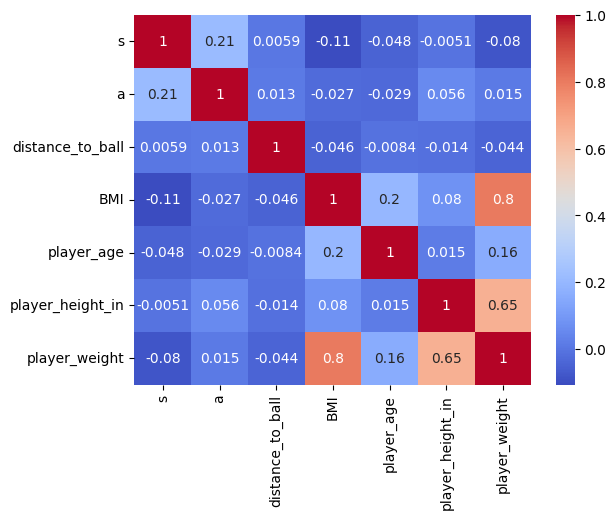

In [65]:
corr = processed_df_input[['s','a','distance_to_ball','BMI','player_age', 'player_height_in', 'player_weight']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')


It comes as no surprise that BMI has a high correlation with both player weight and player height. Therefore, any model containing BMI should exclude both those variables. As for the other variables, s and a show some correlation but not very hight.

## Exploring player level data:
First we explore the player-based data provided in the dataset.

player_name  player_height_in  player_weight        BMI  \
0               Alex Anzalone                75            240  29.994667   
32               Brian Branch                72            193  26.172647   
64       C.J. Gardner-Johnson                71            208  29.006943   
96             Cameron Sutton                71            188  26.217814   
128              Jerry Jacobs                71            198  27.612378   
...                       ...               ...            ...        ...   
4797811             Nick Muse                76            250  30.427632   
4844518         Ekow Boye-Doe                72            171  23.189236   
4862619      A'Shawn Robinson                76            330  40.164474   
4870991        Blake Gillikin                74            196  25.162162   
4871014           Matt Prater                70            201  28.837347   

         player_age player_position player_side  
0             31.09             OLB     Defense  
32            24.00              SS     Defense  
64            27.84              SS     Defense  
96            30.65              CB     Defense  
128           28.07              CB     Defense  
...             ...             ...         ...  
4797811       26.91              TE     Offense  
4844518       25.97              CB     Defense  
4862619       30.59              DE     Defense  
4870991       27.75               P     Offense  
4871014       41.20               K     Offense  

[1388 rows x 7 columns]

<Axes: xlabel='BMI', ylabel='Count'>

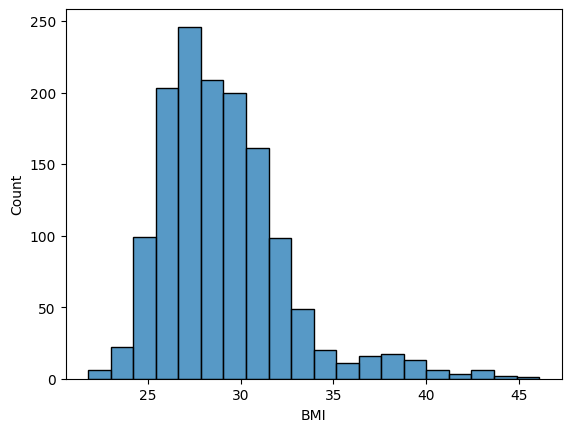

In [63]:
player_summary = (processed_df_input[['player_name','player_height_in','player_weight','BMI','player_age','player_position','player_side']].drop_duplicates())
display(player_summary)
sns.histplot(player_summary['BMI'], bins=20)


<Axes: xlabel='player_position', ylabel='BMI'>

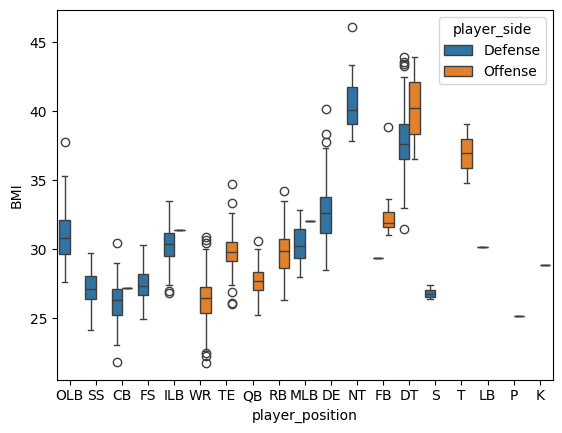

In [72]:
sns.boxplot(x='player_position', y='BMI', hue='player_side', data=player_summary)

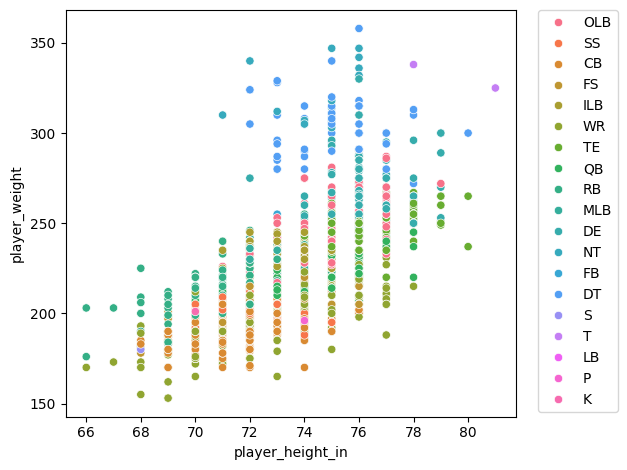

In [52]:
sns.scatterplot(x='player_height_in', y='player_weight', hue='player_position', data=player_summary)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

## Motion- related EDA:
Exploring the data related to player/ball movement.

<Axes: xlabel='s', ylabel='Count'>

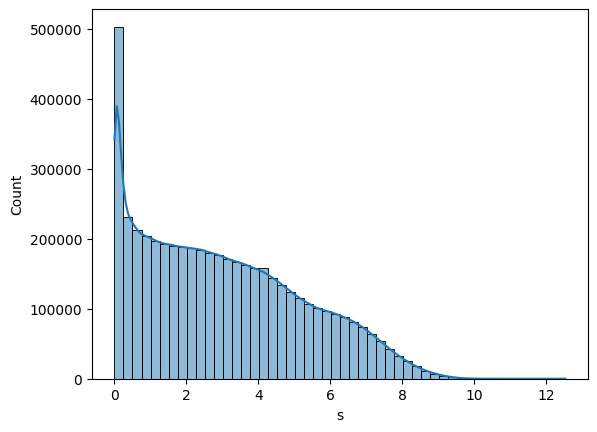

In [54]:
sns.histplot(processed_df_input['s'], bins=50, kde=True)

<Axes: xlabel='s', ylabel='a'>

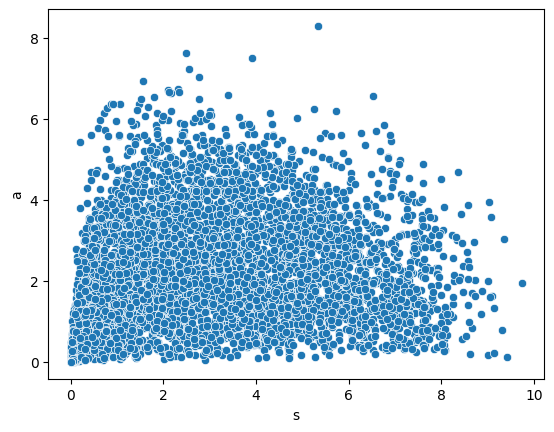

In [55]:
sns.scatterplot(x='s', y='a', data=processed_df_input.sample(5000))  # subset to plot faster

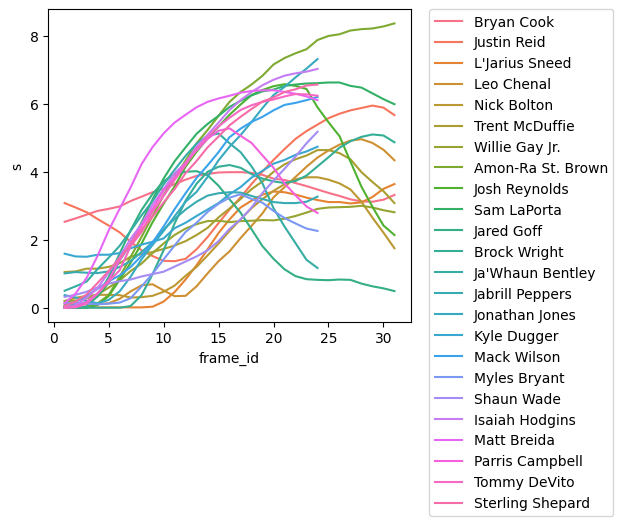

In [57]:
sns.lineplot(x='frame_id', y='s', hue='player_name', data=processed_df_input.query("play_id==1069"))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

## Spatial analysis:
Plot player positions on the field

(0.0, 53.3)

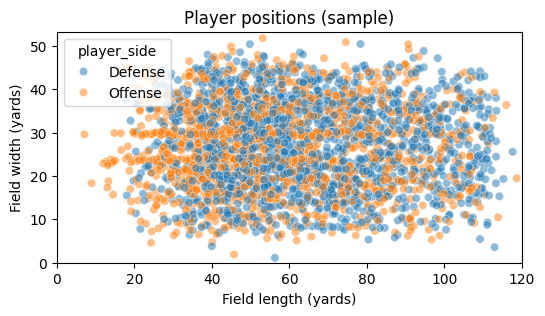

In [ ]:
plt.figure(figsize=(6, 3))
sns.scatterplot(x='x', y='y', hue='player_side', data=processed_df_input.sample(3000), alpha=0.5)
plt.title('Player positions (3000 point sample)')
plt.xlabel('Field length (Yards)')
plt.ylabel('Field width (Yards)')
plt.xlim(0, 120); plt.ylim(0, 53.3)

## Group by frame to see how plays evolve
We choose one play and one game randomly

<Axes: xlabel='frame_id', ylabel='distance_to_ball'>

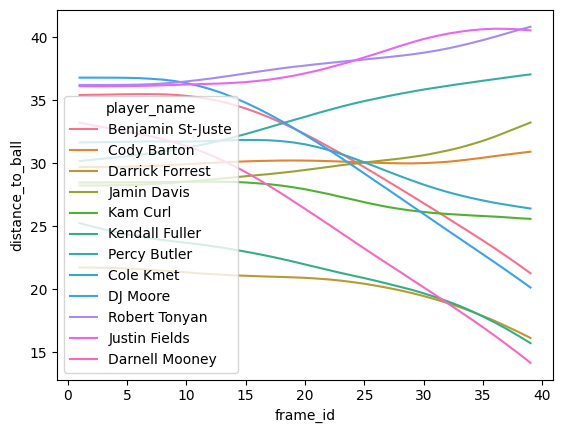

In [61]:
play = processed_df_input.query("game_id==2023100500 and play_id==56")
sns.lineplot(x='frame_id', y='distance_to_ball', data=play, hue='player_name')


## Summarize per player or play for modeling

In [67]:
summary = (processed_df_input.groupby(['game_id','play_id','player_name'])
           .agg({'s':'mean', 'a':'mean', 'distance_to_ball':'min'}).reset_index())
summary


game_id  play_id        player_name         s         a  \
0       2023090700      101  Amon-Ra St. Brown  3.754615  3.528077   
1       2023090700      101       Brock Wright  3.851154  3.060385   
2       2023090700      101         Bryan Cook  2.026538  1.461538   
3       2023090700      101         Jared Goff  0.923077  1.805385   
4       2023090700      101      Josh Reynolds  4.611154  2.975769   
...            ...      ...                ...       ...       ...   
173145  2024010713     4018         Micah Hyde  3.302963  1.918889   
173146  2024010713     4018      Taron Johnson  4.420741  2.343704   
173147  2024010713     4018        Taylor Rapp  3.178148  1.362593   
173148  2024010713     4018     Terrel Bernard  2.951852  2.194815   
173149  2024010713     4018     Tua Tagovailoa  1.629630  2.109259   

        distance_to_ball  
0              21.268497  
1              38.774967  
2              36.314143  
3              39.853407  
4              17.986063  
...                  ...  
173145         22.420281  
173146         13.053019  
173147          8.652364  
173148         28.520731  
173149         31.902729  

[173150 rows x 6 columns]

## computing per player average performance

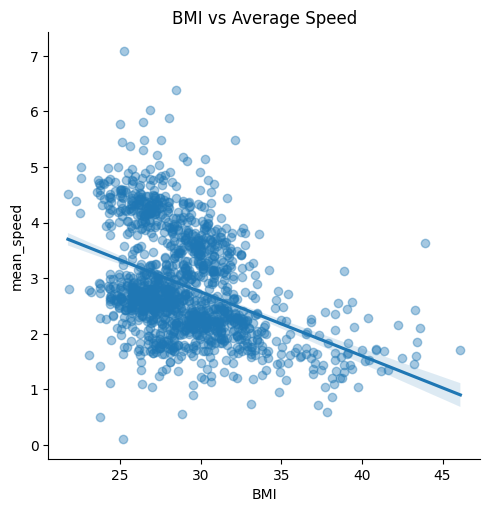

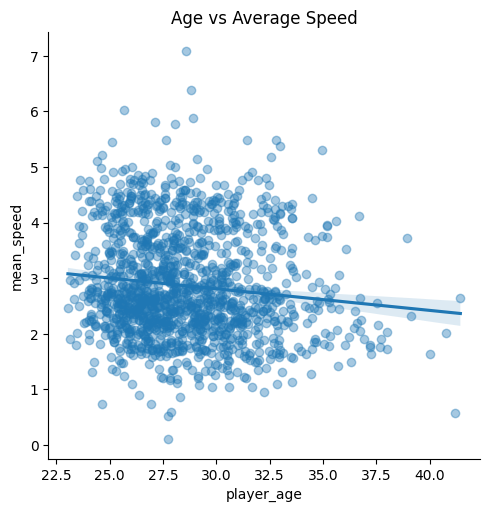

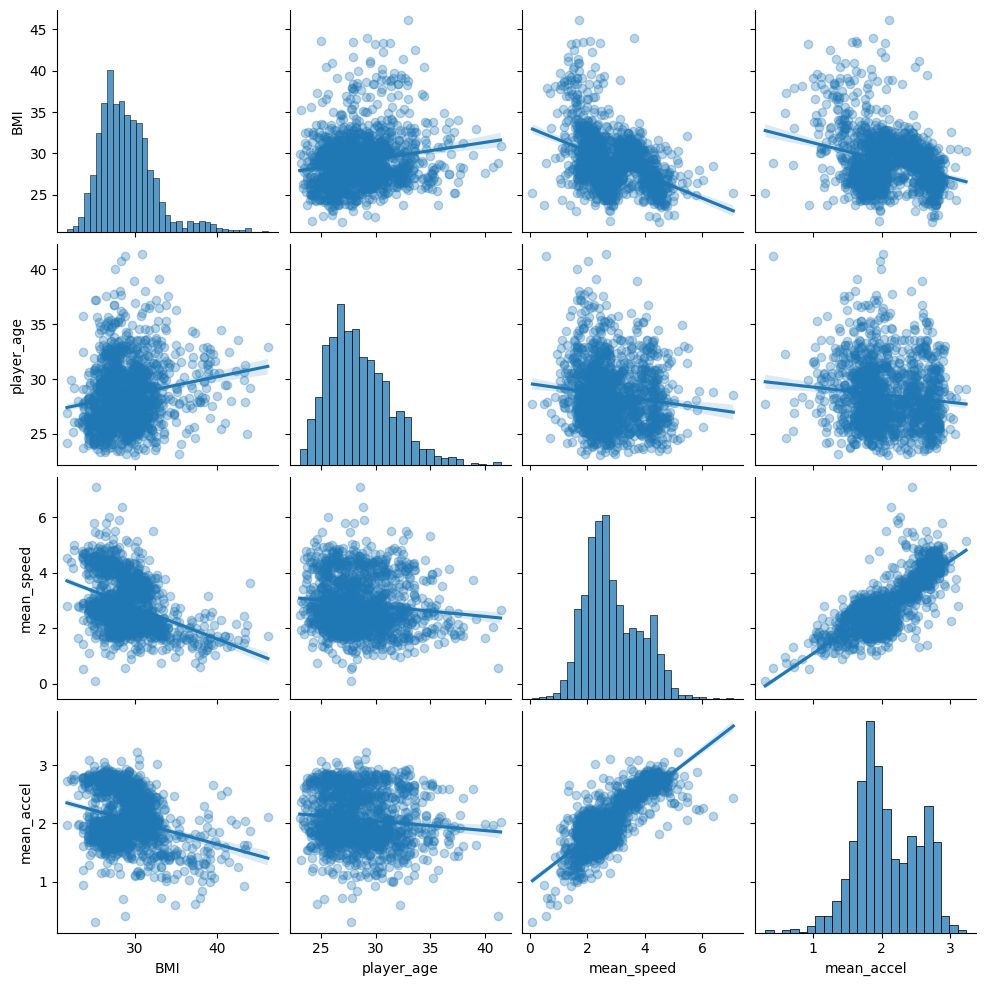

In [70]:
# Aggregate per player (you can also do per player-per-play)
perf = (processed_df_input
        .groupby("nfl_id", as_index=False)
        .agg(mean_speed=("s", "mean"),
             mean_accel=("a", "mean"),
             BMI=("BMI", "first"),
             player_age=("player_age", "first"),
             player_position=("player_position", "first")))

# A) Simple regressions (scatter + fit line)
sns.lmplot(data=perf, x="BMI", y="mean_speed", scatter_kws={"alpha":0.4})
plt.title("BMI vs Average Speed")

sns.lmplot(data=perf, x="player_age", y="mean_speed", scatter_kws={"alpha":0.4})
plt.title("Age vs Average Speed")

# B) Pairplot to see multiple relationships at once
sns.pairplot(perf[["BMI","player_age","mean_speed","mean_accel"]], kind="reg", plot_kws={"scatter_kws":{"alpha":0.3}})


## Heatmaps of player positions across frames

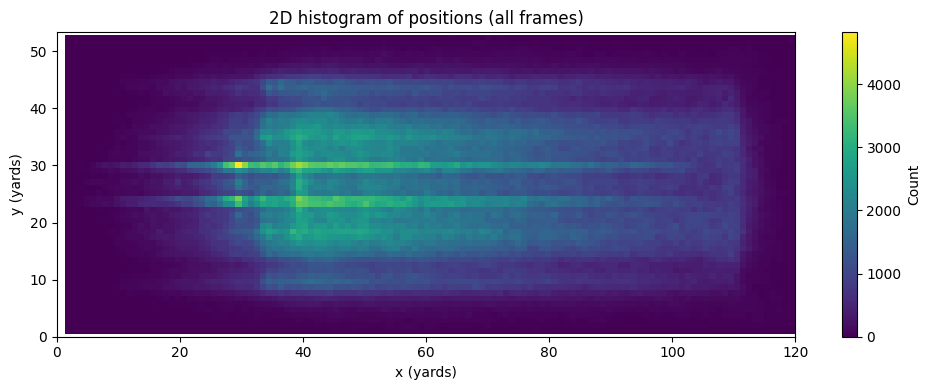

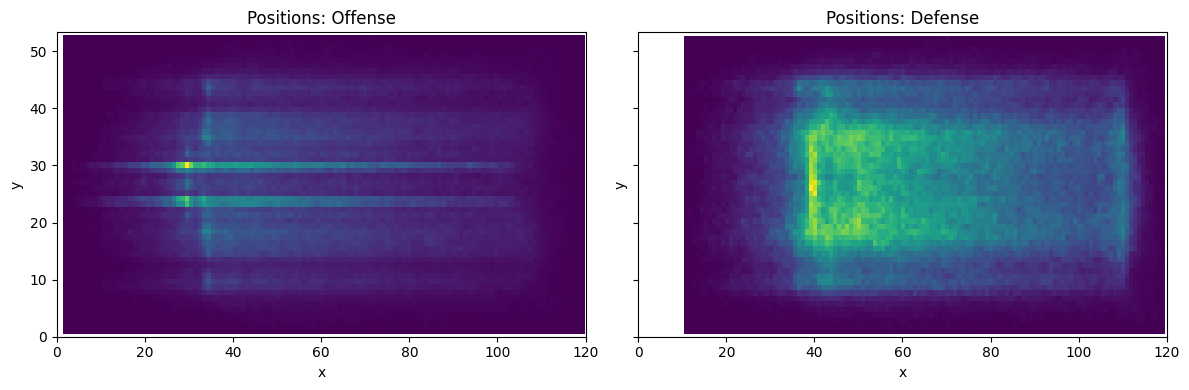

In [71]:
# All players
plt.figure(figsize=(10, 4))
plt.hist2d(processed_df_input["x"], processed_df_input["y"], bins=[120, 54])
plt.colorbar(label="Count")
plt.title("2D histogram of positions (all frames)")
plt.xlabel("x (yards)"); plt.ylabel("y (yards)")
plt.xlim(0, 120); plt.ylim(0, 53.3)
plt.tight_layout()

# By side (offense/defense) — two panels
fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharex=True, sharey=True)
for a, side in zip(ax, ["Offense", "Defense"]):
    sub = processed_df_input[processed_df_input["player_side"] == side]
    a.hist2d(sub["x"], sub["y"], bins=[120, 54])
    a.set_title(f"Positions: {side}")
    a.set_xlim(0,120); a.set_ylim(0,53.3)
    a.set_xlabel("x"); a.set_ylabel("y")
plt.tight_layout()


# Interesting visualtization perhaps?

In [ ]:
ROLE_COLORS = {
    "Targeted Receiver": "red",
    "Passer": "blue",
    "Defensive Coverage": "darkred",
    "Other Route Runner": "orange",
}

def draw_field(ax, start_x=0.0, end_x=120.0, play_direction="right"):
    """Draw an NFL field with endzones, yard lines, and hash marks."""
    field_len = end_x - start_x
    left_goal, right_goal = start_x + 10.0, end_x - 10.0

    # Field + endzones
    if play_direction == "right":
        left_color, right_color = "lightblue", "#f4cccc"
    else:
        left_color, right_color = "#f4cccc", "lightblue"
    ax.add_patch(Rectangle((start_x, 0), field_len, 53.3, facecolor='forestgreen', edgecolor='black', lw=2, zorder=0))
    ax.add_patch(Rectangle((start_x, 0), 10, 53.3, facecolor=left_color, zorder=1))
    ax.add_patch(Rectangle((end_x - 10, 0), 10, 53.3, facecolor=right_color, zorder=1))

    # Sideline ticks
    for x in np.arange(start_x, end_x + 0.1, 1.0):
        for y in [0.4, 53.3 - 0.4]:
            ax.plot([x, x], [y, y + 0.5], color='white', lw=0.4, zorder=2)

    # Yard lines
    for x in np.arange(start_x + 10.0, end_x, 10.0):
        ax.plot([x, x], [0, 53.3], color='white', lw=1.6, zorder=2)

    # Yard numbers
    num_positions = np.arange(start_x + 20.0, end_x - 9.99, 10.0)
    for p in num_positions:
        d = p - left_goal
        label = int(min(d, 100.0 - d))
        ax.text(p, 5, str(label), color='white', fontsize=12, ha='center', va='center')
        ax.text(p, 53.3 - 5, str(label), color='white', fontsize=12, ha='center', va='center')

    # Inbounds hash marks (subtle, semi-transparent)
    hash_y = [18.37, 34.93]
    for x in np.arange(start_x + 10, end_x - 10 + 0.1, 1.0):
        for y in hash_y:
            ax.plot([x, x], [y, y + 0.4], color='white', lw=0.8, alpha=0.5, zorder=2)

    # Limits / aspect
    ax.set_xlim(start_x, end_x)
    ax.set_ylim(0, 53.3)
    ax.set_aspect('equal')
    ax.axis('off')


def draw_legend(ax):
    """Legend for player roles."""
    handles = [Line2D([0], [0], marker='o', color='w', label=role,
                      markerfacecolor=color, markersize=10)
               for role, color in ROLE_COLORS.items()]
    ax.legend(handles=handles, loc='upper center', bbox_to_anchor=(0.5, 1.07),
              ncol=len(handles), framealpha=0.9, frameon=False)


def animate_play(game_id, play_id, df_in, df_out,
                 show_output=True, figsize=(12, 5.33), save_path=None, subsample=1,
                 orientation_length=1.5):
    """Animate player movements for a single play with orientation as lines."""
    in_play = df_in.query("game_id==@game_id & play_id==@play_id").sort_values("frame_id")
    out_play = df_out.query("game_id==@game_id & play_id==@play_id").sort_values("frame_id")
    play_dir = in_play.play_direction.iloc[0]

    if subsample > 1:
        in_play = in_play[in_play["frame_id"] % subsample == 0]
        if not out_play.empty:
            out_play = out_play[out_play["frame_id"] % subsample == 0]

    # Build frames
    frames = []
    for _, grp in in_play.groupby("frame_id"):
        frames.append([dict(x=r.x, y=r.y,
                            color=ROLE_COLORS.get(r.player_role, 'gray'),
                            nfl_id=r.nfl_id,
                            o=getattr(r, "o", None))  # include orientation
                       for _, r in grp.iterrows()])

    if show_output and not out_play.empty:
        ball_x = in_play.ball_land_x.iloc[0]
        ball_y = in_play.ball_land_y.iloc[0]

        out_with_role = out_play.merge(
            in_play[['game_id', 'play_id', 'nfl_id', 'player_role']],
            on=['game_id','play_id','nfl_id'],
            how='left'
        )

        for frame_id, grp in out_with_role.groupby("frame_id"):
            frame_data = [
                dict(
                    x=r.x,
                    y=r.y,
                    color=ROLE_COLORS.get(r.player_role, 'gray'),
                    nfl_id=r.nfl_id,
                    o=None
                ) for _, r in grp.iterrows()
            ]

            # add the ball
            frame_data.append(dict(x=ball_x, y=ball_y, color='black', nfl_id="BALL", 
                                   size=50, zorder=1, marker='X'))
            frames.append(frame_data)

    # Plot
    fig, ax = plt.subplots(figsize=figsize)
    draw_field(ax, play_direction=play_dir)
    draw_legend(ax)
    fig.suptitle(f"Game: {game_id} | Play: {play_id}", fontsize=14, fontweight="bold", y=0.98)

    scat = ax.scatter([], [], s=80, zorder=5)
    max_players = max(len(f) for f in frames)
    texts = [ax.text(0, 0, "", fontsize=6, zorder=6) for _ in range(max_players)]
    orientation_lines = [ax.plot([], [], lw=1, zorder=4)[0] for _ in range(max_players)]

    def init():
        scat.set_offsets(np.zeros((0, 2)))
        for line in orientation_lines:
            line.set_data([], [])
        return (scat, *texts, *orientation_lines)

    def update(i):
        coords = np.array([[p['x'], p['y']] for p in frames[i]])
        scat.set_offsets(coords)
        scat.set_color([p['color'] for p in frames[i]])

        for idx, (t, line, p) in enumerate(zip(texts, orientation_lines, frames[i])):
            # text
            t.set_position((p['x'] + 0.5, p['y'] + 0.5))
            try:
                label = str(int(p['nfl_id']))
            except (ValueError, TypeError):
                label = str(p['nfl_id'])
            t.set_text(label)
            t.set_fontsize(6)
            t.set_fontweight('normal')
            t.set_visible(True)

            # orientation line only if orientation exists
            if p.get('o') is not None and not pd.isna(p['o']):
                angle_rad = np.deg2rad(p['o'])
                length = orientation_length

                # Thank you Robert Hatch for correcting
                x_end = p['x'] + length * np.sin(angle_rad)
                y_end = p['y'] + length * np.cos(angle_rad)

                line.set_data([p['x'], x_end], [p['y'], y_end])
                line.set_color(p['color'])
                line.set_visible(True)
            else:
                line.set_data([], [])
                line.set_visible(False)

        for t in texts[len(frames[i]):]:
            t.set_visible(False)
        for line in orientation_lines[len(frames[i]):]:
            line.set_visible(False)

        return (scat, *texts, *orientation_lines)

    anim = animation.FuncAnimation(fig, update, frames=len(frames),
                                   init_func=init, blit=True, interval=100)

    plt.close(fig)
    if save_path:
        anim.save(save_path, fps=10, dpi=150)
        print(f"Saved animation to {save_path}")
    else:
        return anim


In [47]:
SUBSAMPLE = 1 # Optional subsampling (e.g. use 2 to keep every 2nd frame for speed)

GAME_ID = df_input['game_id'].iloc[1]
PLAY_ID = df_input.query("game_id==@GAME_ID")['play_id'].iloc[1]

anim = animate_play(GAME_ID, PLAY_ID, df_input, df_output, subsample=SUBSAMPLE)
HTML(anim.to_jshtml())

In [ ]:

# Animation code edited to prevent players disappearing.

ROLE_COLORS = {
    "Targeted Receiver": "red",
    "Passer": "blue",
    "Defensive Coverage": "darkred",
    "Other Route Runner": "orange",
}

# --------------------------
# Field drawing
# --------------------------
def draw_field(ax, start_x=0.0, end_x=120.0, play_direction="right"):
    """Draw an NFL field with endzones, yard lines, hash marks."""
    field_len = end_x - start_x
    left_goal, right_goal = start_x + 10.0, end_x - 10.0

    # Field + endzones
    left_color, right_color = ("lightblue", "#f4cccc") if play_direction == "right" else ("#f4cccc", "lightblue")
    ax.add_patch(Rectangle((start_x, 0), field_len, 53.3, facecolor='forestgreen',
                           edgecolor='black', lw=2, zorder=0))
    ax.add_patch(Rectangle((start_x, 0), 10, 53.3, facecolor=left_color, zorder=1))
    ax.add_patch(Rectangle((end_x - 10, 0), 10, 53.3, facecolor=right_color, zorder=1))

    # Sideline ticks
    for x in np.arange(start_x, end_x + 0.1, 1.0):
        for y in [0.4, 53.3 - 0.4]:
            ax.plot([x, x], [y, y + 0.5], color='white', lw=0.4, zorder=2)

    # Yard lines
    for x in np.arange(start_x + 10.0, end_x, 10.0):
        ax.plot([x, x], [0, 53.3], color='white', lw=1.6, zorder=2)

    # Yard numbers
    num_positions = np.arange(start_x + 20.0, end_x - 9.99, 10.0)
    for p in num_positions:
        d = p - left_goal
        label = int(min(d, 100.0 - d))
        ax.text(p, 5, str(label), color='white', fontsize=12, ha='center', va='center')
        ax.text(p, 53.3 - 5, str(label), color='white', fontsize=12, ha='center', va='center')

    # In-bounds hash marks (subtle)
    hash_y = [18.37, 34.93]
    for x in np.arange(start_x + 10, end_x - 10 + 0.1, 1.0):
        for y in hash_y:
            ax.plot([x, x], [y, y + 0.4], color='white', lw=0.8, alpha=0.5, zorder=2)

    # Limits / aspect
    ax.set_xlim(start_x, end_x)
    ax.set_ylim(0, 53.3)
    ax.set_aspect('equal')
    ax.axis('off')

def draw_legend(ax):
    handles = [Line2D([0], [0], marker='o', color='w', label=role,
                      markerfacecolor=color, markersize=10)
               for role, color in ROLE_COLORS.items()]
    ax.legend(handles=handles, loc='upper center', bbox_to_anchor=(0.5, 1.07),
              ncol=len(handles), framealpha=0.9, frameon=False)

# --------------------------
# Animation
# --------------------------
def animate_play(game_id, play_id, df_input, df_output,
                 show_output=True, figsize=(12, 5.33), save_path=None, subsample=1):
    """
    Animate a single play. Players from df_in are shown every frame;
    df_out points are OVERLAID on the SAME frames (so players don't 'disappear').
    Ball is drawn every frame as a separate scatter marker.
    """
    # ---- slice the play ----
    in_play = (df_input.query("game_id==@game_id & play_id==@play_id")
                    .sort_values(["frame_id", "nfl_id"]))
    out_play = (df_output.query("game_id==@game_id & play_id==@play_id")
                     .sort_values(["frame_id", "nfl_id"]))

    play_dir = in_play.play_direction.iloc[0]

    # optional subsampling by frame_id
    if subsample > 1:
        in_play = in_play[in_play["frame_id"] % subsample == 0]
        if not out_play.empty:
            out_play = out_play[out_play["frame_id"] % subsample == 0]

    # ---- build a dict of frame_id -> list of player dicts (from df_in) ----
    frame_map = {}
    for fid, grp in in_play.groupby("frame_id"):
        frame_map[fid] = [
            dict(x=r.x, y=r.y,
                 color=ROLE_COLORS.get(r.player_role, 'gray'),
                 nfl_id=r.nfl_id)   # NO orientation lines anymore
            for _, r in grp.iterrows()
        ]

    # ---- overlay df_out points on the SAME frames (no replacements) ----
    if show_output and not out_play.empty:
        # bring roles over for coloring
        out_with_role = out_play.merge(
            in_play[['game_id','play_id','nfl_id','player_role']].drop_duplicates(),
            on=['game_id','play_id','nfl_id'], how='left'
        )
        for fid, grp in out_with_role.groupby("frame_id"):
            frame_map.setdefault(fid, [])
            frame_map[fid].extend([
                dict(x=r.x, y=r.y,
                     color=ROLE_COLORS.get(r.player_role, 'gray'),
                     nfl_id=r.nfl_id)
                for _, r in grp.iterrows()
            ])

    # ---- ball location (constant landing spot) ----
    ball_x = in_play.ball_land_x.iloc[0]
    ball_y = in_play.ball_land_y.iloc[0]

    # ensure every frame id appears in order
    all_fids = sorted(frame_map)
    frames = [frame_map[fid] for fid in all_fids]

    # ---- plot scaffolding ----
    fig, ax = plt.subplots(figsize=figsize)
    draw_field(ax, play_direction=play_dir)
    draw_legend(ax)
    fig.suptitle(f"Game: {game_id} | Play: {play_id}", fontsize=14, fontweight="bold", y=0.98)

    # one scatter for players, one for ball, and per-player text labels
    player_scat = ax.scatter([], [], s=80, zorder=5)
    ball_scat   = ax.scatter([], [], s=50, zorder=6, c='black', marker='X')
    ball_label  = ax.text(0, 0, "BALL", fontsize=7, color='black', fontweight='bold', zorder=7)

    max_players = max(len(f) for f in frames)
    texts = [ax.text(0, 0, "", fontsize=6, zorder=6) for _ in range(max_players)]

    # ---- init ----
    def init():
        player_scat.set_offsets(np.zeros((0, 2)))
        ball_scat.set_offsets(np.zeros((0, 2)))
        for t in texts:
            t.set_visible(False)
            ball_label.set_visible(False)
        return (player_scat, ball_scat, ball_label, *texts)

    # ---- per-frame update ----
    def update(i):
        # players
        coords = np.array([[p['x'], p['y']] for p in frames[i]])
        colors = [p['color'] for p in frames[i]]
        player_scat.set_offsets(coords)
        player_scat.set_color(colors)

        # labels for players
        for idx, (t, p) in enumerate(zip(texts, frames[i])):
            t.set_position((p['x'] + 0.5, p['y'] + 0.5))
            try:
                label = str(int(p['nfl_id']))
            except (ValueError, TypeError):
                label = str(p['nfl_id'])
            t.set_text(label)
            t.set_fontsize(6)
            t.set_visible(True)
        for t in texts[len(frames[i]):]:
            t.set_visible(False)

        # ball (constant landing spot in this example)
        ball_scat.set_offsets(np.array([[ball_x, ball_y]]))
        ball_label.set_position((ball_x + 0.5, ball_y + 0.5))
        ball_label.set_visible(True)

        return (player_scat, ball_scat, ball_label, *texts)

    anim = animation.FuncAnimation(fig, update, frames=len(frames),
                                   init_func=init, blit=True, interval=100)
    plt.close(fig)

    if save_path:
        # If you want an HTML5 video, ensure ffmpeg is available or use to_jshtml()
        anim.save(save_path, fps=10, dpi=150)
        print(f"Saved animation to {save_path}")
    else:
        return anim


In [78]:
SUBSAMPLE = 1
GAME_ID = df_input['game_id'].iloc[1]
PLAY_ID = df_input.query("game_id==@GAME_ID")['play_id'].iloc[1]

anim = animate_play(GAME_ID, PLAY_ID, df_input, df_output, subsample=SUBSAMPLE)
HTML(anim.to_jshtml())


# Model selection:
